In [14]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import sklearn.neighbors as nei
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.ensemble as ensem
import random as rm
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
import seaborn as sns

In [4]:
n=50.0
rok=[]
roktest=[]

for i in range(int(n)):
    for s in range(int(n)):
        j=rm.random()*8-4
        k=rm.random()*8-4
        rok.append([j,k])

X=np.asarray(rok)
Y=[]
for x in rok:
    resp=0
    lens=[1, 2, 3, 4]
    con2=0
    for m in [[2,2], [3,-3], [-2,-2], [-3,2]]:  
        con=0
        i=0
        for s in x:
            i=i+(s-m[con])**2
            con=con+1
        if i<=lens[con2]:
            resp=1
        con2=con2+1
    Y.append([resp])
Y=np.asarray(Y)
X=np.asarray(X)

for i in range(int(n)):
    for s in range(int(n)):
        j=rm.random()*8-4
        k=rm.random()*8-4
        roktest.append([j,k])

Xtest=np.asarray(roktest)
Ytest=[]
for x in roktest:
    resp=0
    lens=[1, 2, 3, 4]
    con2=0
    for m in [[2,2], [3,-3], [-2,-2], [-3,2]]:  
        con=0
        i=0
        for s in x:
            i=i+(s-m[con])**2
            con=con+1
        if i<=lens[con2]:
            resp=1
        con2=con2+1
    Ytest.append([resp])
Ytest=np.asarray(Ytest)
Xtest=np.asarray(Xtest)

n=100.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])

Colors=np.asarray(rok)

In [58]:
accuracies=dict()
aux=0
for depth in [1, 2, 4, 8, 16, 32, 64]:
    dt=tree.DecisionTreeClassifier(max_depth=depth)
    accuracies[depth]=dict()
    for nt in [1, 2, 4, 8, 16, 32, 64]:
        aux=0
        aux2=0
        rf=ensem.RandomForestClassifier(n_estimators=nt, max_depth=depth)
        for seed in [1, 2, 3]:
            rf.fit(X, Y.ravel())
            dt.fit(X, Y.ravel())
            aux=aux+rf.score(Xtest, Ytest)/3
            aux2=aux2+dt.score(Xtest, Ytest)/3
        accuracies[depth][nt]=dict()
        accuracies[depth][nt][0]=aux
        accuracies[depth][nt][1]=aux2
        


        
        
        

In [79]:
i=0
j=0
dta=[]
rfa=[]
keys=list(accuracies.keys())
keys.sort()
accur=pd.DataFrame(accuracies)
for k in keys:
    dta.append([])
    rfa.append([])
    dta[i].append(accuracies[k][1][1])
    for k2 in keys:
        rfa[i].append(accuracies[k][k2][0])
    i=i+1

Below is the heatmap for The decission tree accuracy and further down we can see the accuracy heatmap for the random forest. We can see that increasing the depth of the decision tree increases the accuracy to almost 100%. This increase seems to reach a plateau at 16 depth. On the other hand, for each possible depth I ran a random forest with different number of estimators. We can see that adding the number of estimators was good when we had shors depth. Nonetheless, when the depth increased, the improvement decreases. At this point, a plateau is reached at 16 estimators. 

Text(0.5,15,'')

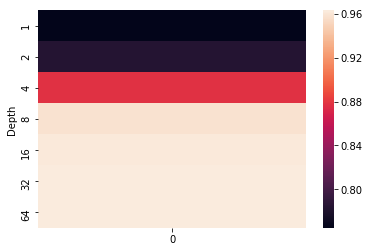

In [84]:
%matplotlib inline
au=sns.heatmap(dta,  yticklabels=keys)
au.set_ylabel('Depth')    
au.set_xlabel('')

rfa

Text(0.5,15,'Number of estimators')

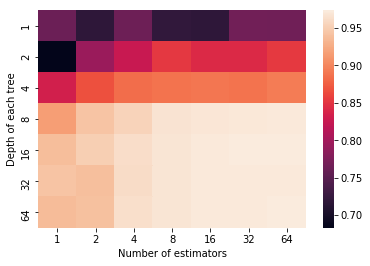

In [85]:
au=sns.heatmap(rfa, xticklabels=keys, yticklabels=keys)
au.set_ylabel('Depth of each tree')    
au.set_xlabel('Number of estimators')    
